1. Using the Colab notebook, import the following packages/ libraries/ modules:

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn


2. Import and load the dataset. Set the client_id as the index.

In [ ]:
file_path = "/content/drive/MyDrive/Datasets/loans.csv"
df = pd.read_csv(file_path, index_col = "client_id")

3. Display the contents of the dataset by showing its first 5 rows.


In [ ]:
df.head(5)

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


4. Check the info of the dataset and the datatypes for each columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


5. Determine whether the dataset has missing values.

In [ ]:
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

6. Check if there is a presence of outliers using Boxplot.

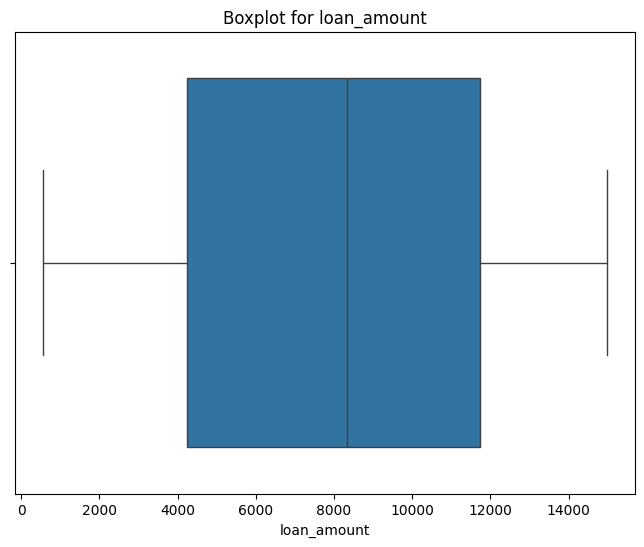

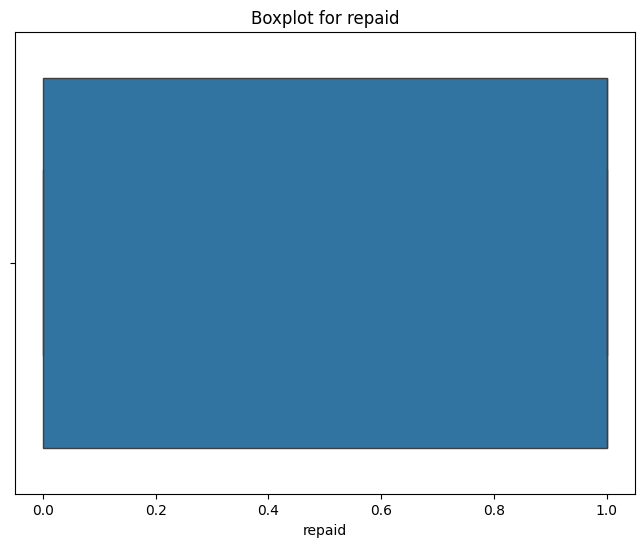

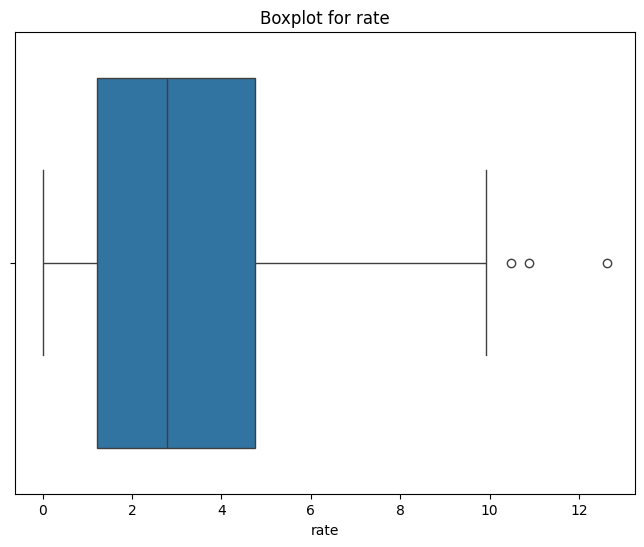

In [ ]:
numeric_columns = ['loan_amount', 'repaid', 'rate']

for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

7. If there are a presence of outliers, do the following and explain the results:





a. Treat them using SQRT transformation

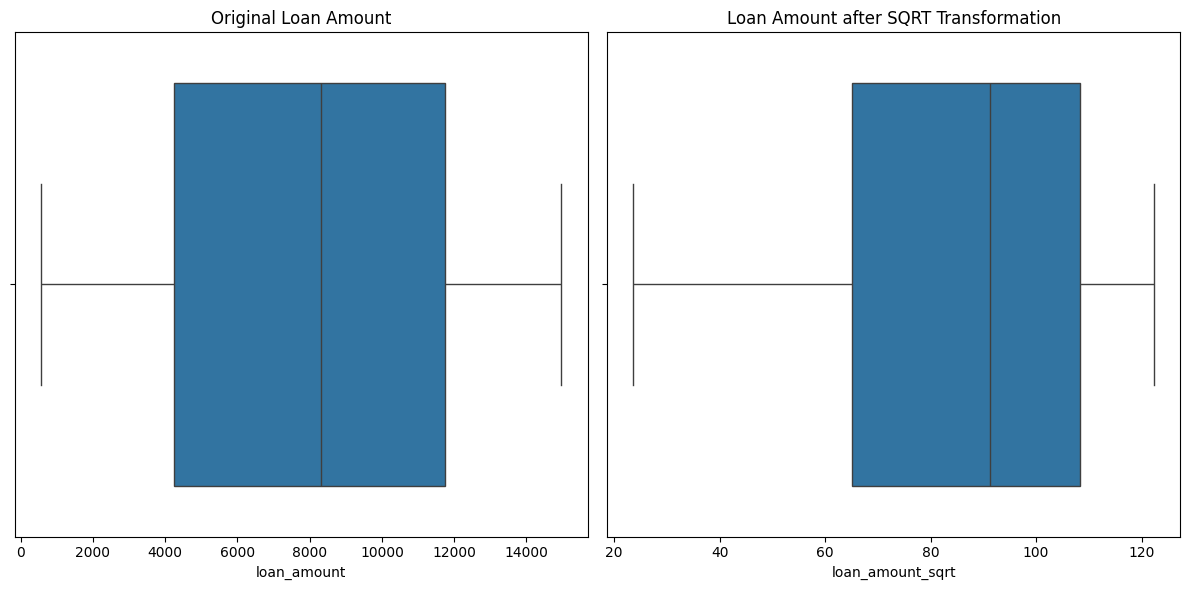

In [ ]:
# Assuming df is your DataFrame
numeric_columns = ['loan_amount']

# Create a new DataFrame with the square root transformation
df_sqrt_transformed = df.copy()
df_sqrt_transformed['loan_amount_sqrt'] = np.sqrt(df['loan_amount'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['loan_amount'])
plt.title('Original Loan Amount')

# Square root transformed data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_sqrt_transformed['loan_amount_sqrt'])
plt.title('Loan Amount after SQRT Transformation')

plt.tight_layout()
plt.show()

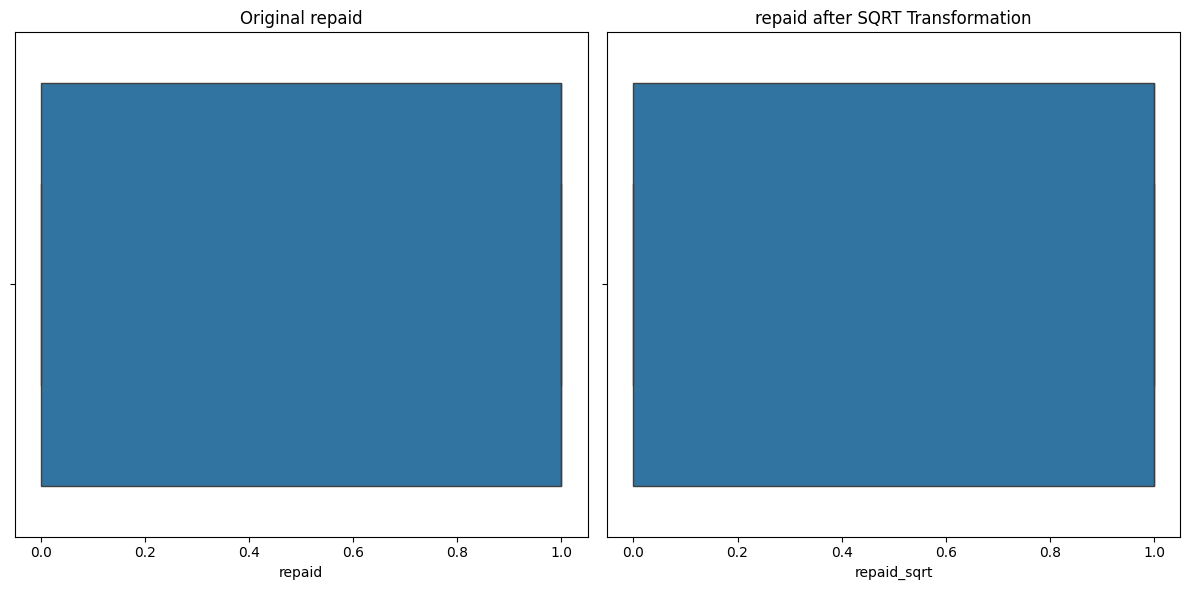

In [ ]:
# Assuming df is your DataFrame
numeric_columns = ['repaid']

# Create a new DataFrame with the square root transformation
df_sqrt_transformed = df.copy()
df_sqrt_transformed['repaid_sqrt'] = np.sqrt(df['repaid'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['repaid'])
plt.title('Original repaid')

# Square root transformed data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_sqrt_transformed['repaid_sqrt'])
plt.title('repaid after SQRT Transformation')

plt.tight_layout()
plt.show()

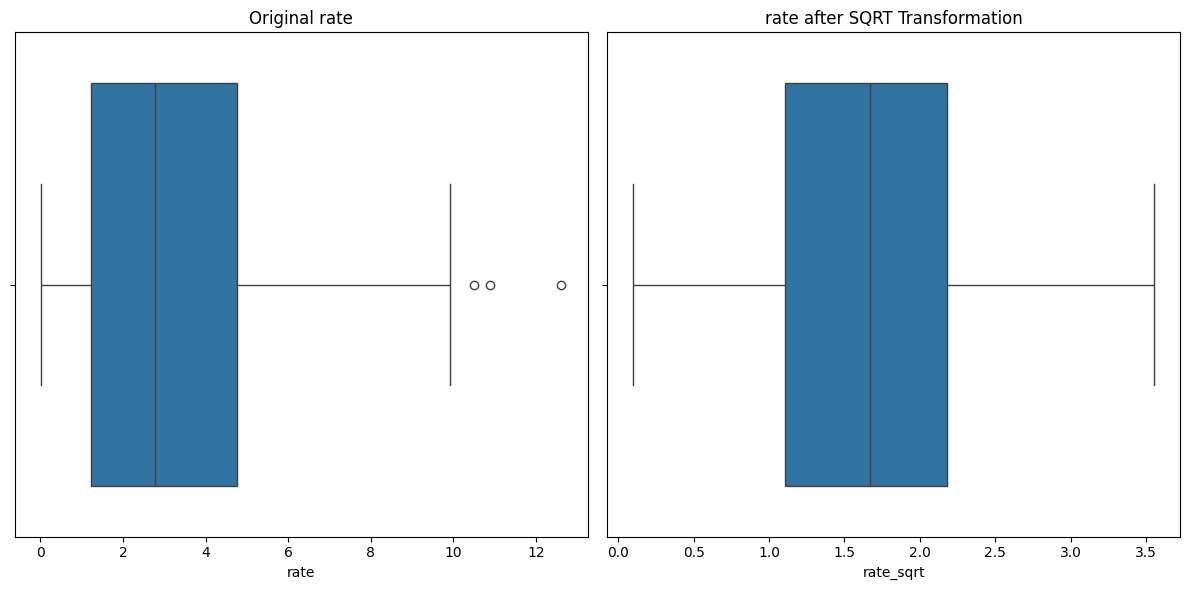

In [ ]:
# Assuming df is your DataFrame
numeric_columns = ['rate']

# Create a new DataFrame with the square root transformation
df_sqrt_transformed = df.copy()
df_sqrt_transformed['rate_sqrt'] = np.sqrt(df['rate'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['rate'])
plt.title('Original rate')

# Square root transformed data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_sqrt_transformed['rate_sqrt'])
plt.title('rate after SQRT Transformation')

plt.tight_layout()
plt.show()

b. Treat them using the capping approach: Z-Score.

In [ ]:
from scipy.stats import zscore

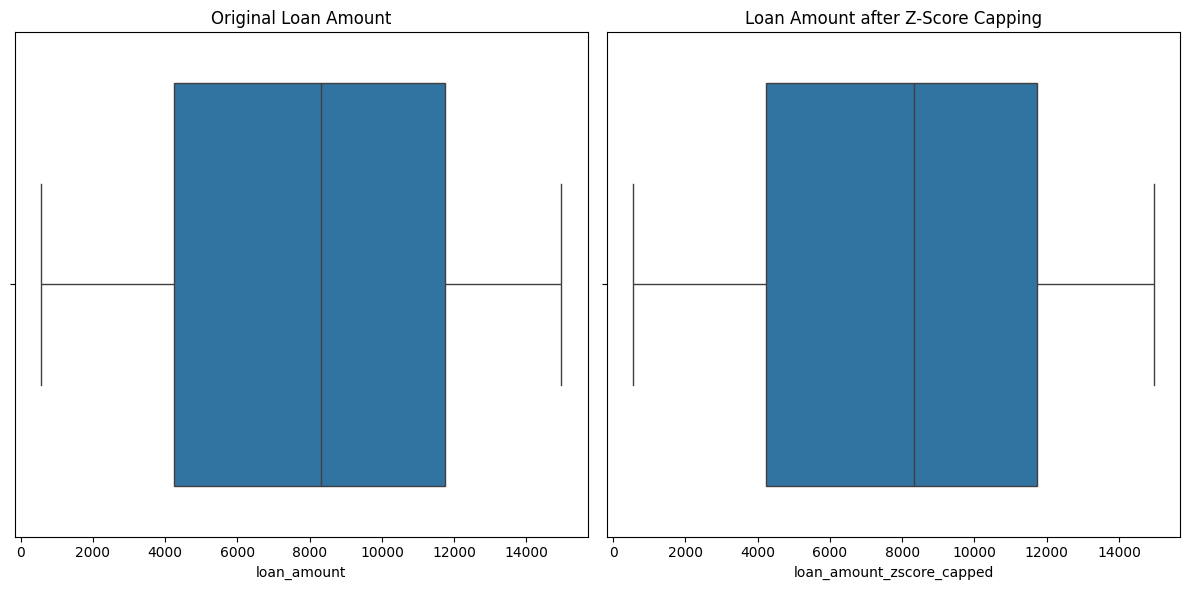

In [ ]:
# Assuming df is your DataFrame
numeric_columns = ['loan_amount']

# Calculate z-scores
z_scores = zscore(df['loan_amount'])

# Create a new DataFrame with z-score capped values
df_zscore_capped = df.copy()
df_zscore_capped['loan_amount_zscore_capped'] = np.where((z_scores > 3) | (z_scores < -3), np.median(df['loan_amount']), df['loan_amount'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['loan_amount'])
plt.title('Original Loan Amount')

# Z-score capped data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_zscore_capped['loan_amount_zscore_capped'])
plt.title('Loan Amount after Z-Score Capping')

plt.tight_layout()
plt.show()

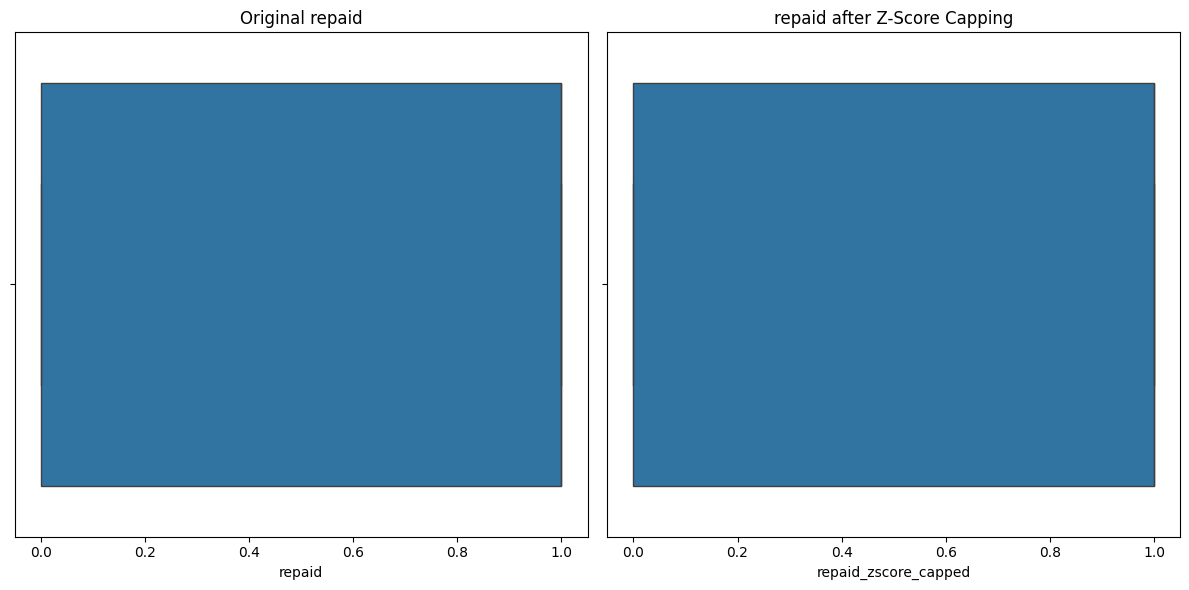

In [ ]:
# Assuming df is your DataFrame
numeric_columns = ['repaid']

# Calculate z-scores
z_scores = zscore(df['repaid'])

# Create a new DataFrame with z-score capped values
df_zscore_capped = df.copy()
df_zscore_capped['repaid_zscore_capped'] = np.where((z_scores > 3) | (z_scores < -3), np.median(df['repaid']), df['repaid'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['repaid'])
plt.title('Original repaid')

# Z-score capped data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_zscore_capped['repaid_zscore_capped'])
plt.title('repaid after Z-Score Capping')

plt.tight_layout()
plt.show()

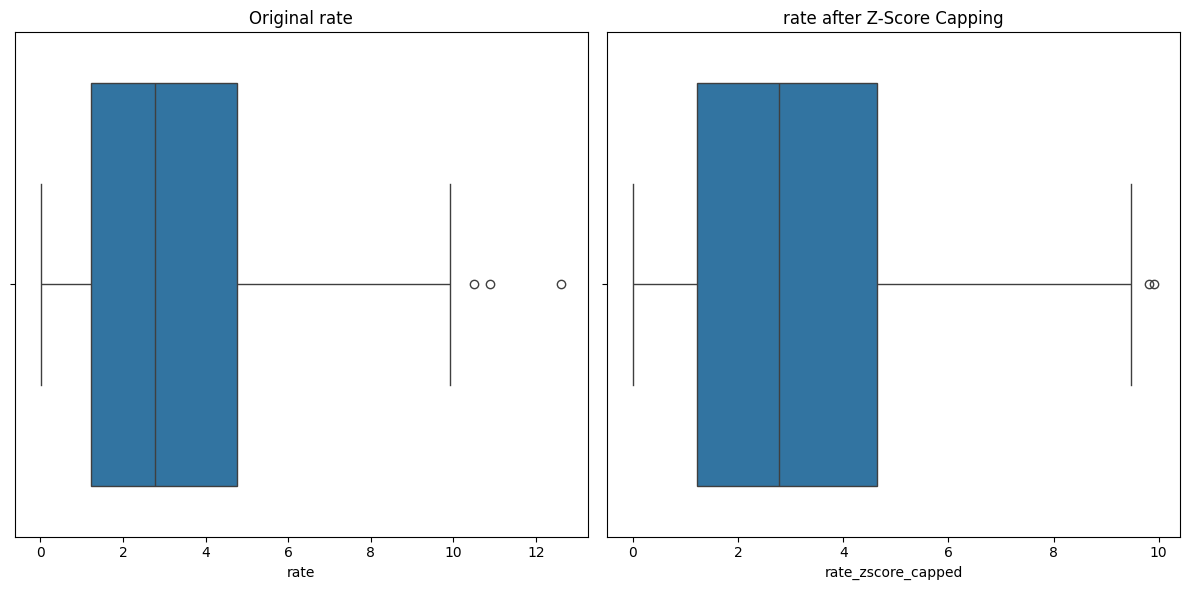

In [ ]:
# Assuming df is your DataFrame
numeric_columns = ['rate']

# Calculate z-scores
z_scores = zscore(df['rate'])

# Create a new DataFrame with z-score capped values
df_zscore_capped = df.copy()
df_zscore_capped['rate_zscore_capped'] = np.where((z_scores > 3) | (z_scores < -3), np.median(df['rate']), df['rate'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['rate'])
plt.title('Original rate')

# Z-score capped data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_zscore_capped['rate_zscore_capped'])
plt.title('rate after Z-Score Capping')

plt.tight_layout()
plt.show()

8. Upon checking the datatypes for each columns, for numerical variables, apply scaling using Min-Max Normalization. Display the skewness and kurtosis graphs for Loan Amount and explain the results.

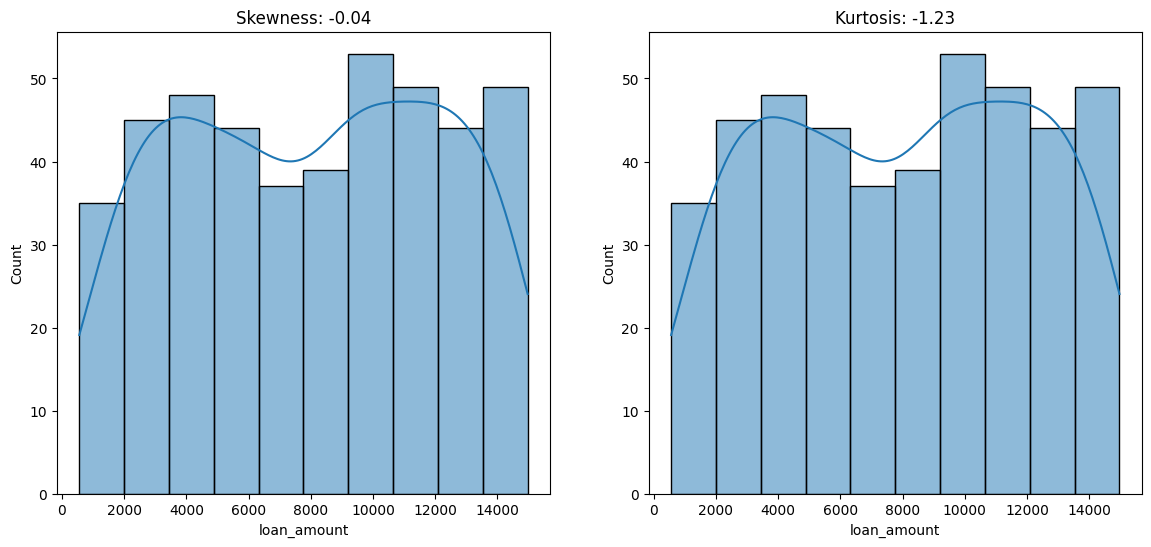

In [ ]:
from scipy.stats import skew, kurtosis
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['loan_amount'], kde=True)
plt.title(f'Skewness: {round(skew(df["loan_amount"]), 2)}')

plt.subplot(1, 2, 2)
sns.histplot(df['loan_amount'], kde=True)
plt.title(f'Kurtosis: {round(kurtosis(df["loan_amount"]), 2)}')

plt.show()

9. As for the categorical features, apply encoding of categorical variables into dummy variables using pd.get_dummies approach. Show the first five (5) rows.

In [ ]:
# Assuming df is your DataFrame
categorical_columns = ['loan_type']

# Apply pd.get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first five rows
print(df_encoded.head())

           loan_amount  repaid  loan_id  loan_start    loan_end  rate  \
client_id                                                               
46109            13672       0    10243  2002-04-16  2003-12-20  2.15   
46109             9794       0    10984  2003-10-21  2005-07-17  1.25   
46109            12734       1    10990  2006-02-01  2007-07-05  0.68   
46109            12518       1    10596  2010-12-08  2013-05-05  1.24   
46109            14049       1    11415  2010-07-07  2012-05-21  3.13   

           loan_type_credit  loan_type_home  loan_type_other  
client_id                                                     
46109                     0               1                0  
46109                     1               0                0  
46109                     0               1                0  
46109                     0               0                0  
46109                     1               0                0  


10. Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.

In [ ]:
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])
df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days / 365

print(df[['loan_start', 'loan_end', 'loan_tenure']].head())

          loan_start   loan_end  loan_tenure
client_id                                   
46109     2002-04-16 2003-12-20     1.679452
46109     2003-10-21 2005-07-17     1.739726
46109     2006-02-01 2007-07-05     1.421918
46109     2010-12-08 2013-05-05     2.408219
46109     2010-07-07 2012-05-21     1.873973


11. Split the data into training and test sets with 80-20 division.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_amount', axis=1)
y = df['loan_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (354, 7) (354,)
Test set shape: (89, 7) (89,)
